In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mp
%matplotlib inline

In [3]:
os.getcwd()

'E:\\DSP_Classes\\graphs'

In [ ]:
os.

In [8]:
pd.Series([12,54,23,78,65,34,78,56,54,19],index=list(range(-10,0)))


-10    12
-9     54
-8     23
-7     78
-6     65
-5     34
-4     78
-3     56
-2     54
-1     19
dtype: int64

In [3]:
# drawing a simple two variable plot
x = np.arange(20)
# arange() is similar to range()
# 
y = x ** 2 # y = sq of all elements of x

In [4]:
y

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144,
       169, 196, 225, 256, 289, 324, 361], dtype=int32)

In [ ]:
# generate a scatter plot (X,Y Cartesian Plot)

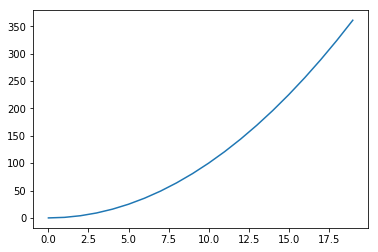

In [6]:
plt.plot(x,y,)
plt.show() # this is required to get outputs if we didn't use inline

In [ ]:
X = np.linspace(-3, 2,200) # linearly spaced vectors

Y = X ** 2 - 2 * X + 1.
plt.plot(X, Y)
plt.show()

In [7]:
os.chdir("E:/DSP_Classes/DataSets")

In [8]:
stores = pd.read_csv("stores.csv")

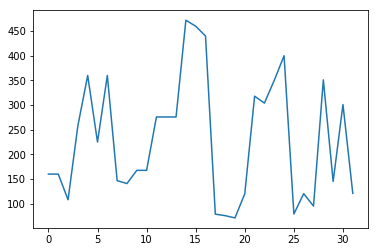

In [17]:
plt.plot(stores.TotalSales)
plt.show()

In [ ]:
# Y axis is taken by default

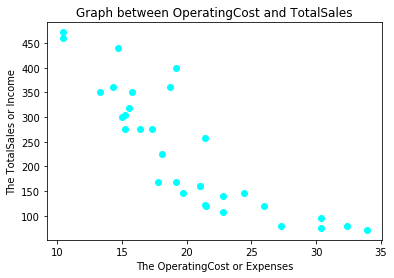

In [22]:
TS = stores.TotalSales
OC = stores.OperatingCost

plt.scatter(y = TS,x = OC,color = "cyan")
plt.title("Graph between OperatingCost and TotalSales")
plt.xlabel("The OperatingCost or Expenses") # x axis label
plt.ylabel("The TotalSales or Income") # y axis label
# plt.xscale() or yscale() - change the range in x/y axis
plt.show()

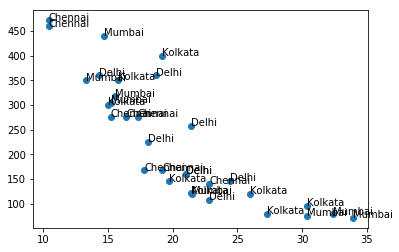

In [31]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

plt.scatter(list(OC), list(TS))
label_point(OC, TS, stores.Location, plt)
plt.show()

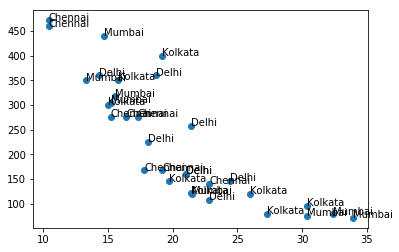

In [31]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

plt.scatter(list(OC), list(TS))
label_point(OC, TS, stores.Location, plt)
plt.show()

In [ ]:
# Drawing multiple plots
x = np.linspace(100,500,32)
plt.plot(x,stores.TotalSales)
plt.plot(np.linspace(100,400,32),stores.TotalSales)

plt.show()

In [ ]:
# The scatter plots
data = np.random.rand(200,2)
data
# 200 random numbers with shape = 2, i.e., a 2-d ndarray

In [ ]:
plt.scatter(data[:,0], data[:,1])
plt.show()

In [ ]:
#For the stores dataset, we can plot TotalSales and OperatingCost
plt.scatter(y = stores.TotalSales, x = stores.OperatingCost)
plt.show()

In [ ]:
# Use the color argument to add colors`
plt.scatter(y = stores.TotalSales, x = stores.OperatingCost, color = "deepskyblue")
plt.show()

# color reference can be found at 
# http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf

In [ ]:
# Getting all color names so as to generate random colors for the graphs
colorDict = mp.colors.cnames 
# from matplotlib package, get the colors as mentioned in the above pdf

colors = []
for i in colorDict:
    colors.append(i)

# colors variable is a list data structure of all available colors

# to get n random values from colors list
import random
random.sample(colors,3)

In [ ]:
# using the above in the scatter plot
plt.scatter(y = stores.TotalSales, x = stores.OperatingCost, color = random.sample(colors,1))
plt.show()

In [ ]:
# Using colors to add a new variable

# Add the column location and add appropriate colors to the 
# each unique values of it.

# Get the unique values in Location, first:
LocUnique = stores.Location.unique()

# Get it's count
LocUniqueCount = stores.Location.nunique() # or, len(LocUnique)

# Get colors
ColAssign = random.sample(colors,LocUniqueCount)



plt.scatter(y = stores.TotalSales, x = stores.OperatingCost, color = ColAssign)

# Adding a legend : 
# For a legend you need some shapes as well as the unique values for the 
# categorical variable that we are adding. 
# For example, the following creates a list of rectangles called recs 
# for each colour in ColAssign that gets assigned for each of the location
import matplotlib.patches as mpatches
recs = []
for i in range(0,len(ColAssign)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=ColAssign[i]))
plt.legend(recs,LocUnique,loc=1)


plt.show()

In [ ]:
data = [5., 25., 50., 20.]
plt.bar(range(len(data)), data, width=0.5)
# First, x coordinate for each bar start point
#        Here, we use the coordinates 0, 1, 2, and so on, 
#        for each bar, which is the purpose of range(len(data))

# second, the height of each bar

# width gives the thickness of the bar
plt.show()

In [ ]:
# SumOfTotalSales (sum of TOtalSales column), group by Location

tmp = stores.groupby(["Location"])
Result = tmp.TotalSales.agg({"SumOfTotalSales":sum}).reset_index()

Result


In [ ]:
ax = Result[['Location','SumOfTotalSales']].plot(kind='bar', title ="Location wise Sales", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Location", fontsize=12)
ax.set_ylabel("SumOfTotalSales", fontsize=12)
ax.set_xticklabels(Result['Location'])

plt.show()

In [ ]:
ResultWide = Result.pivot(columns='Location', values='SumOfTotalSales')
ResultWide.plot(kind='bar', stacked=True, figsize=(12, 5))
plt.show()

In [ ]:
# SumOfTotalSales (sum of TOtalSales column), group by Location and StoreType

tmp = stores.groupby(["Location","StoreType"])
Result = tmp.TotalSales.agg({"SumOfTotalSales":sum}).reset_index()


In [ ]:
ResultWide = Result.pivot(index='Location', columns='StoreType', values='SumOfTotalSales')
ResultWide.reset_index()
ResultWide.plot(kind='bar', figsize=(12, 5))
plt.show()

In [ ]:
# Histograms & Density Plots

# Histograms_: Pass `kind='hist'` to `pd.plot()` or use the method `pd.hist()`
# Density Plots_: Use `kind='kde'`

pd.Series(np.random.randn(1000)).hist(bins=20, alpha=0.4)
plt.show()

In [ ]:
stores.TotalSales.hist(bins=5, alpha=0.4)
plt.show()

In [ ]:
# Box plot

plt.boxplot(stores.TotalSales)
plt.show()

In [ ]:
USJudgeRatings = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/datasets/USJudgeRatings.csv")

In [ ]:
USJudgeRatings.dtypes

In [ ]:
plt.boxplot(USJudgeRatings.RTEN)
plt.show()

In [ ]:
# Generate random numbers
np.random.randint(1000,size=100)
np.random.random(100)
dice = pd.Series(np.random.uniform(high=6,low=1,size=100))
dice = dice.astype(int)

plt.hist(dice)

In [ ]:
data = np.random.normal(loc=112,scale=5,size=10000)
# loc = mean
# scale = SD
data = pd.Series(data) # data was np.ndarray, convert it into Series
plt.hist(data, bins=100,color="black")
plt.title("Hist")
plt.show()

In [ ]:
plt.boxplot(data,meanline=True)
plt.show()


In [ ]:
OC = stores.OperatingCost
plt.boxplot(OC)
plt.show()

# IQR = Q3 - Q1
# LC = Q1 - 1.5 * IQR
# UC = Q3 + 1.5 * IQR

In [ ]:
data.hist(bins=100)
plt.show()

In [ ]:
LocTS = stores.groupby("Location")[["TotalSales"]].sum().add_prefix("SumOf_").reset_index()

In [ ]:
plt.figure(figsize=(15,4))

LocTS.plot(kind="bar")
plt.show()

In [ ]:
LocST_TS = stores.groupby(["Location","StoreType"])[["TotalSales"]].sum().add_prefix("SumOf_").reset_index()

In [ ]:
LocST_TS.plot(kind="bar")

In [ ]:
stores.TotalSales.plot(kind = "hist")

In [ ]:
s = pd.Series(np.random.randn(100)).cumsum()
[12,34,56,78,23]
s.plot(kind='line',
       grid=True, 
       legend=True,
       label='timeseries', # title of the legend
       title='Random Normal Numbers - Cumulative Series', # Main title
       xlim=(0, 100), 
       ylim=(-10, 12),
       xticks=np.arange(0, 100,10), 
       yticks=np.arange(-10, 12, 2),
       style='go-', 
       alpha=1, # transparency
       figsize=(15, 4)
      )

In [ ]:
from plotnine import *

In [ ]:
# ggplot - grammar of graphics
# Scatterplot


# 1. get an empty canvas : 

# ggplot(data = stores) + theme_matplotlib()

# 2. Add axes to the graph -> visual aesthetics -> aes(x=,y=)

# 3. Draw or add the main geometry
# geometry -> what kind of graph are we expecting
# geom_bar(stat = "identity") -> bar graph
# geom_hist()
# geom_boxplot()
# geom_point()
# geom_line()

(
    ggplot(data = stores) +
    theme_matplotlib() +
    aes(x = "OperatingCost",y = "TotalSales") +
    geom_point(color = "maroon")

)
# http://www.stat.columbia.edu/~tzheng/files/Rcolor.pdf

In [ ]:
# Add location to the graph as color
# Location -> Categorical
# diff cat -> diff colors
(
    ggplot(data = stores)+
    aes(x = "OperatingCost",y = "TotalSales",color = "Location")+
    geom_point()
)

# Task :
# Change the color pallatte

In [ ]:
# facetting the graph
(
    ggplot(data = stores)+
    aes(x = "OperatingCost",y = "TotalSales")+
    geom_point(color = "blue") + 
    facet_grid(".~Location")
)

# facet formula
# y ~ x # y is depending on x (in general, not just for facets)

# y -> dividing the graph by Y axis (horizontally) = . (nothing)
# x -> dividing the graph by X axis (vartically) = .

# ". ~ Location"


In [ ]:
(
    ggplot(data = stores)+
    aes(x = "OperatingCost",y = "TotalSales")+
    geom_point(color = "blue") + 
    facet_grid(".~Location") + 
    xlab("Operating Cost/Expense")+
    ylab("Total Sales") + 
    ggtitle("Scatter Plot bn OC and TC across Locations")

)

    #xlim() + ylim() +
    #scale_x_continuous() + scale_y_continuous()

In [ ]:
# Bar Graphs : 

LocTS

In [ ]:
(
    ggplot(data = LocTS)+
    aes(x = "Location", y = "SumOf_TotalSales") +
    geom_bar(stat = "identity",fill = "orange",color = "black")
)

In [ ]:
# Stacked bar plot
LocST_TS

In [ ]:
(
    ggplot(data = LocST_TS)+
    aes(x = "Location", y = "SumOf_TotalSales",fill = "StoreType") +
    geom_bar(stat = "identity",color = "black")
)

In [ ]:
# Dodged bar
(
    ggplot(data = LocST_TS)+
    aes(x = "Location", y = "SumOf_TotalSales",fill = "StoreType") +
    geom_bar(stat = "identity",color = "black",position = "dodge")
)

In [ ]:
(
    ggplot(data = LocST_TS)+
    aes(x = "StoreType", y = "SumOf_TotalSales") +
    geom_bar(stat = "identity",fill = "orange",color = "black") +
    facet_grid(".~Location")
)

# y ~ x


In [ ]:
stores.dropna(subset=["AcqCostPercust","Location"])


In [ ]:
stores.rename({"Location":"City"},axis=1)


In [ ]:
item_price = pd.Series(["$12","$45","$6","$7","$3","$2"])

In [ ]:
item_price = item_price.str.replace("$","").astype(float)